In [19]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
import osmnx as ox
from util import Dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:2


In [7]:

args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  5,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device,
    'noise':             0.3 # Set to 0 to not train on noisy features
}

# Hyperparameter optimized for 9/7

# args = {
#     'processor':         'GENConv',
#     'head':              'regression',     
#     'num_layers':        4,
#     'num_mlp_layers':    2,
#     'aggr':              'max',
#     'batch_size':        8,
#     'node_feature_dim':  5,
#     'edge_feature_dim':  1,
#     'graph_feature_dim': 2,
#     'hidden_dim':        58,
#     'output_dim':        1,
#     'dropout':           0.066,
#     'epochs':            80,
#     'opt':               'adagrad',
#     'opt_scheduler':     'none',
#     'opt_restart':       0,
#     'weight_decay':      5e-3,
#     'lr':                0.0022434,
#     'device':            device,
#     'noise':             0 # Set to 0 to not train on noisy features
# }


In [3]:
train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(9, 7, train_num, rng, args, **er_config),
        *ig.sample_instances(9, 7, train_num, rng, args, **ba_config),
        *ig.sample_instances(9, 7, train_num, rng, args, **geom_config),
    ]

test_instances = [
        *ig.sample_instances(9, 7, test_num, rng, args, **er_config),
        *ig.sample_instances(9, 7, test_num, rng, args, **ba_config),
        *ig.sample_instances(9, 7, test_num, rng, args, **geom_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [4]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


TRAINING LOSS: 0.07940945425878201


Training:   4%|▍         | 1/25 [00:03<01:15,  3.15s/Epochs]

TEST LOSS: 0.06046627089381218
TEST ACCURACY: 0.602218747138977


Training:   8%|▊         | 2/25 [00:04<00:54,  2.38s/Epochs]

TRAINING LOSS: 0.06224934781544546


Training:  12%|█▏        | 3/25 [00:06<00:48,  2.21s/Epochs]

TRAINING LOSS: 0.055184668228518995


Training:  16%|█▌        | 4/25 [00:08<00:44,  2.11s/Epochs]

TRAINING LOSS: 0.05272894966457085
TRAINING LOSS: 0.05061237095753054


Training:  20%|██        | 5/25 [00:11<00:46,  2.31s/Epochs]

TEST LOSS: 0.04727112874388695
TEST ACCURACY: 0.6212361454963684


Training:  24%|██▍       | 6/25 [00:13<00:42,  2.21s/Epochs]

TRAINING LOSS: 0.04859072281765178


Training:  28%|██▊       | 7/25 [00:15<00:38,  2.14s/Epochs]

TRAINING LOSS: 0.04758371026608692


Training:  32%|███▏      | 8/25 [00:17<00:35,  2.11s/Epochs]

TRAINING LOSS: 0.046719015454620316
TRAINING LOSS: 0.046793673952104


Training:  36%|███▌      | 9/25 [00:20<00:36,  2.30s/Epochs]

TEST LOSS: 0.04664153605699539
TEST ACCURACY: 0.6101426482200623


Training:  40%|████      | 10/25 [00:22<00:32,  2.18s/Epochs]

TRAINING LOSS: 0.04595726624396547


Training:  44%|████▍     | 11/25 [00:24<00:28,  2.06s/Epochs]

TRAINING LOSS: 0.0452297305986774


Training:  48%|████▊     | 12/25 [00:26<00:26,  2.02s/Epochs]

TRAINING LOSS: 0.045073622134151926
TRAINING LOSS: 0.04474718370514153


Training:  52%|█████▏    | 13/25 [00:28<00:26,  2.22s/Epochs]

TEST LOSS: 0.04502153769135475
TEST ACCURACY: 0.6212361454963684


Training:  56%|█████▌    | 14/25 [00:30<00:23,  2.09s/Epochs]

TRAINING LOSS: 0.0442878705987946


Training:  60%|██████    | 15/25 [00:32<00:20,  2.01s/Epochs]

TRAINING LOSS: 0.043883259850706915


Training:  64%|██████▍   | 16/25 [00:34<00:18,  2.01s/Epochs]

TRAINING LOSS: 0.04356283523079493
TRAINING LOSS: 0.042612093856039736


Training:  68%|██████▊   | 17/25 [00:36<00:17,  2.20s/Epochs]

TEST LOSS: 0.044027701020240784
TEST ACCURACY: 0.6244057416915894


Training:  72%|███████▏  | 18/25 [00:38<00:14,  2.14s/Epochs]

TRAINING LOSS: 0.04288300824715584


Training:  76%|███████▌  | 19/25 [00:40<00:12,  2.07s/Epochs]

TRAINING LOSS: 0.042345206034147195


Training:  80%|████████  | 20/25 [00:42<00:10,  2.03s/Epochs]

TRAINING LOSS: 0.04247237912675099
TRAINING LOSS: 0.04175625681430241


Training:  84%|████████▍ | 21/25 [00:45<00:08,  2.25s/Epochs]

TEST LOSS: 0.04258685186505318
TEST ACCURACY: 0.6212361454963684


Training:  88%|████████▊ | 22/25 [00:47<00:06,  2.16s/Epochs]

TRAINING LOSS: 0.04165305982098584


Training:  92%|█████████▏| 23/25 [00:49<00:04,  2.08s/Epochs]

TRAINING LOSS: 0.0415885672357279


Training:  96%|█████████▌| 24/25 [00:51<00:02,  2.06s/Epochs]

TRAINING LOSS: 0.04211848528030998
TRAINING LOSS: 0.04112290218123344


Training: 100%|██████████| 25/25 [00:54<00:00,  2.16s/Epochs]

TEST LOSS: 0.04191574826836586
TEST ACCURACY: 0.6164817810058594


In [ ]:
# save(GNN, args, 'GNN2_hyperparam_tuned')

In [ ]:
# GNN, args = load('GNN2', device)

In [ ]:
from gnn_library.OBM_greedy import OBM_Greedy
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy

thresholds = np.linspace(0, 1, 101)
thresholded_greedy_models = [(threshold, OBM_Threshold_Greedy(threshold)) for threshold in thresholds]

seed = np.random.randint(0, 500000)
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 10, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

greedy_ratios = {}
for threshold, model in thresholded_greedy_models: 
    ratio = evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=eval_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
pp_output(ratios2, _, show_log=False)
print(greedy_ratios)

In [ ]:
max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(max_threshold, greedy_ratios[max_threshold])

# Pivot to feature-generated graphs

In [ ]:
def get_location_graph(city):
	location_graph = ox.graph_from_place(city, network_type="drive")
	location_graph = ox.speed.add_edge_speeds(location_graph)
	location_graph = ox.speed.add_edge_travel_times(location_graph)
	return {'location_graph': location_graph, 'city': city}

In [ ]:
piedmont = get_location_graph("Piedmont, California, USA")
# san_francisco = get_location_graph("San Francisco, California, USA")
founex = get_location_graph("Founex, Switzerland")
carmel = get_location_graph("Carmel, Indiana, USA")
geneva = get_location_graph("Geneva, Switzerland")

In [ ]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
feat_config = {
    'graph_type': 'FEAT',
    'q': 0.85,
    'weighted': True
}
# osmnx_config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# osmnx_config_2 = {
#     'graph_type': 'OSMNX',
#     'location_graph': san_francisco['location_graph']
# }

# ox.plot_graph(piedmont['location_graph'])
# ox.plot_graph(san_francisco['location_graph'])

# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# },
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 3,
#     'eps': 0.3
# }

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **er_config),
        *ig.sample_instances(8, 8, train_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]

test_instances = [
        *ig.sample_instances(8, 8, test_num, rng, **er_config),
        *ig.sample_instances(8, 8, test_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [ ]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

## Set up the threshold greedy value
The instance set used to determine the threshold should be the same as the training set for the base models. Here we reduce the number of instances to make the evaluation faster.

For the moment, the instance set is the evaluation set since they are too different and would disadvantage threshold greedy.

In [ ]:
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy
from tqdm import tqdm
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)


thresholds = np.linspace(0, 1, 101)
thresholds = np.linspace(0, 1, 2) # TODO remove
#TODO max value in threshold should be max value observable in graphs (is not the case for osmnx graphs for the moment)
thresholded_greedy_models = {threshold: OBM_Threshold_Greedy(threshold) for threshold in thresholds}

osmnx_config1 = {
    'graph_type': 'OSMNX',
    'location_graph': piedmont['location_graph']
}
osmnx_config2 = {
    'graph_type': 'OSMNX',
    'location_graph': geneva['location_graph']
}
osmnx_config3 = {
    'graph_type': 'OSMNX',
    'location_graph': carmel['location_graph']
}

train_num = 10
train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config1),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config2),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config3),
]

# train_instances = [
#         *ig.sample_instances(8, 8, train_num, rng, **er_config),
#         *ig.sample_instances(8, 8, train_num, rng, **ba_config),
#         *ig.sample_instances(8, 8, train_num, rng, **feat_config),
#         *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
# ]


greedy_ratios = {}
for threshold, model in tqdm(thresholded_greedy_models.items()): 
    rng = np.random.default_rng(seed)
    ratio = ev.evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=train_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
    

max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(f"Best threshold value: {max_threshold} achieves CR: {greedy_ratios[max_threshold]}")
THRESHOLD_MODEL = thresholded_greedy_models[max_threshold]

In [ ]:
print(greedy_ratios)

## Evaluation

In [ ]:
seed = np.random.randint(0, 500000)
(m, n) = (32, 16)
# config = {
#     'graph_type': 'FEAT',
#     'q': 0.85,
#     'weighted': True
# }
# config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# }

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, 100, rng, **config)
eval_num = 25
eval_instances = [
        *ig.sample_instances(m, n, eval_num, rng, **er_config),
        *ig.sample_instances(m, n, eval_num, rng, **ba_config),
        *ig.sample_instances(m, n, eval_num, rng, **feat_config),
        *ig.sample_instances(m, n, eval_num, rng, **osmnx_config),
]

ratios = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)


ratios2 = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[THRESHOLD_MODEL],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios, _, show_log=False)
print(f"Thresholded greedy: {np.mean(ratios2[0]).round(4)}")


### Baseline ER/BA/GEOM evaluation

In [6]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 40, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

models = [("GNN", GNN)]

graph_configs = [
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    # {
    #     'graph_type': 'GEOM',
    #     'threshold': 0.2,
    #     'scaling': 1 / np.sqrt(2),
    #     'weighted': True
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['graph_type']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)


        rng = np.random.default_rng(seed)

        baselines = ['greedy']
        for model_name, model in models:
            cr_ratios = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[model],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=5,
                # baselines=['greedy', 'lp_rounding']
                baselines=baselines
            )

            baselines = []

            cr_ratios[model_name] = cr_ratios.pop("learned")

        data[graph_config['graph_type']].append(cr_ratios)

[0.25, 0.75, 1.25, 1.75, 2.25]
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (36, 16)
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True} (4, 16)
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True} (12, 16)
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True} (20, 16)
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True} (28, 16)
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True} (36, 16)


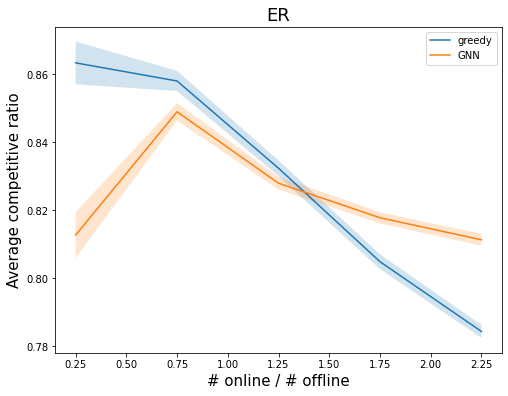

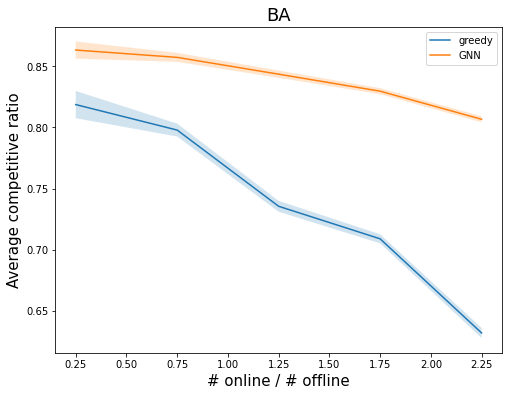

In [7]:
from util import _plot_approx_ratios
_plot_approx_ratios(ratios, data, lambda graph_type: graph_type, confidence = 0.95)

In [ ]:
import matplotlib.pyplot as plt

ratios = [x/y for (x,y) in node_configs]

for graph_type, comp_ratios in data.items():
    aggregated_ratios = {}

    for trial_ratios in comp_ratios:
        for model, ratio_values in trial_ratios.items():
            current_ratios = aggregated_ratios.get(model, [])
            current_ratios.append(np.array(ratio_values).mean())
            aggregated_ratios[model] = current_ratios

    fig = plt.figure(figsize=(8,6))
    for model, model_ratios in aggregated_ratios.items():
        plt.plot(ratios, model_ratios, label=model)

    title = f"{graph_type}"
    plt.title(title)
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/17_01_2024_{title}_no_probabilities.png")
    plt.show()


## Noise experiments

In [3]:
def create_noise_robust_models(noise_values):
    models = []
    for noise_value in noise_values:
        print(f"Training model for noise {noise_value}")
        args = {
        'processor':         'GENConv',
        'head':              'regression',
        'num_layers':        2,
        'num_mlp_layers':    2,
        'aggr':              'max',
        'batch_size':        32,
        'node_feature_dim':  5,
        'edge_feature_dim':  1,
        'graph_feature_dim': 2,
        'hidden_dim':        64,
        'output_dim':        1,
        'dropout':           0.35,
        'epochs':            25,
        'opt':               'adam',
        'opt_scheduler':     'none',
        'opt_restart':       0,
        'weight_decay':      5e-3,
        'lr':                0.0001,
        'device':            device,
        'noise':             noise_value # Set to 0 to not train on noisy features
        }

        train_num = 100; test_num = 30

        er_config = {
            'graph_type': 'ER',
            'p': 0.75,
            'weighted': True
        }
        ba_config = {
            'graph_type': 'BA',
            'ba_param': 2,
            'weighted': True
        }
        geom_config = {
            'graph_type': 'GEOM',
            'threshold': 0.2,
            'scaling': 1 / np.sqrt(2)
        }

        rng = np.random.default_rng()


        train_instances = [
                *ig.sample_instances(9, 7, train_num, rng, args, **er_config),
                *ig.sample_instances(9, 7, train_num, rng, args, **ba_config),
                *ig.sample_instances(9, 7, train_num, rng, args, **geom_config),
            ]

        test_instances = [
                *ig.sample_instances(9, 7, test_num, rng, args, **er_config),
                *ig.sample_instances(9, 7, test_num, rng, args, **ba_config),
                *ig.sample_instances(9, 7, test_num, rng, args, **geom_config),
            ]


        train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
        test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

        train_loader = DataLoader(
            train_data,
            batch_size=args['batch_size'],
            shuffle=True,
            num_workers=4
        )

        test_loader = DataLoader(
            test_data,
            batch_size=args['batch_size'],
            shuffle=True,
            num_workers=4
        )


        _, _, _, GNN, _ = train(train_loader, test_loader, args)
        models.append((f"GNN_{args['noise']}", GNN))
    return models

In [4]:
noise_values = [0, 0.1, 0.2, 0.5, 10]
models = create_noise_robust_models(noise_values)

Training model for noise 0


Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


TRAINING LOSS: 0.18358167412096285


Training:   4%|▍         | 1/25 [00:03<01:23,  3.46s/Epochs]

TEST LOSS: 0.10373175144195557
TEST ACCURACY: 0.7765451669692993


Training:   8%|▊         | 2/25 [00:05<01:03,  2.75s/Epochs]

TRAINING LOSS: 0.07808877419116753


Training:  12%|█▏        | 3/25 [00:07<00:54,  2.49s/Epochs]

TRAINING LOSS: 0.05982879756836434


Training:  16%|█▌        | 4/25 [00:10<00:50,  2.40s/Epochs]

TRAINING LOSS: 0.055385644764148
TRAINING LOSS: 0.04564883979209235


Training:  20%|██        | 5/25 [00:13<00:52,  2.63s/Epochs]

TEST LOSS: 0.042877454310655594
TEST ACCURACY: 0.8399366140365601


Training:  24%|██▍       | 6/25 [00:15<00:48,  2.53s/Epochs]

TRAINING LOSS: 0.04293761840880577


Training:  28%|██▊       | 7/25 [00:17<00:45,  2.51s/Epochs]

TRAINING LOSS: 0.039668943774216286


Training:  32%|███▏      | 8/25 [00:20<00:40,  2.40s/Epochs]

TRAINING LOSS: 0.03658031005536058
TRAINING LOSS: 0.03503893417515878


Training:  36%|███▌      | 9/25 [00:23<00:41,  2.58s/Epochs]

TEST LOSS: 0.03417458012700081
TEST ACCURACY: 0.8526149392127991


Training:  40%|████      | 10/25 [00:25<00:36,  2.45s/Epochs]

TRAINING LOSS: 0.03211249415230047


Training:  44%|████▍     | 11/25 [00:27<00:33,  2.39s/Epochs]

TRAINING LOSS: 0.030623899023581255


Training:  48%|████▊     | 12/25 [00:29<00:30,  2.34s/Epochs]

TRAINING LOSS: 0.02866473436575534
TRAINING LOSS: 0.02699540012492025


Training:  52%|█████▏    | 13/25 [00:32<00:30,  2.52s/Epochs]

TEST LOSS: 0.023357147350907326
TEST ACCURACY: 0.8510301113128662


Training:  56%|█████▌    | 14/25 [00:34<00:26,  2.41s/Epochs]

TRAINING LOSS: 0.025505750161695304


Training:  60%|██████    | 15/25 [00:37<00:23,  2.35s/Epochs]

TRAINING LOSS: 0.024270129585947937


Training:  64%|██████▍   | 16/25 [00:39<00:20,  2.29s/Epochs]

TRAINING LOSS: 0.023953098384491632
TRAINING LOSS: 0.02220142444396371


Training:  68%|██████▊   | 17/25 [00:42<00:20,  2.50s/Epochs]

TEST LOSS: 0.01755855418741703
TEST ACCURACY: 0.8557844758033752


Training:  72%|███████▏  | 18/25 [00:44<00:16,  2.42s/Epochs]

TRAINING LOSS: 0.02138345149032964


Training:  76%|███████▌  | 19/25 [00:46<00:14,  2.40s/Epochs]

TRAINING LOSS: 0.02030524572982999


Training:  80%|████████  | 20/25 [00:49<00:11,  2.38s/Epochs]

TRAINING LOSS: 0.019936437316486318
TRAINING LOSS: 0.01916446822705744


Training:  84%|████████▍ | 21/25 [00:52<00:10,  2.56s/Epochs]

TEST LOSS: 0.013796666637063026
TEST ACCURACY: 0.8541997075080872


Training:  88%|████████▊ | 22/25 [00:54<00:07,  2.47s/Epochs]

TRAINING LOSS: 0.018434437070852936


Training:  92%|█████████▏| 23/25 [00:56<00:04,  2.42s/Epochs]

TRAINING LOSS: 0.017707855172620267


Training:  96%|█████████▌| 24/25 [00:58<00:02,  2.37s/Epochs]

TRAINING LOSS: 0.016915282509478696
TRAINING LOSS: 0.01669449631702086


Training: 100%|██████████| 25/25 [01:01<00:00,  2.47s/Epochs]

TEST LOSS: 0.012196263298392296
TEST ACCURACY: 0.8621236681938171
Training model for noise 0.1



Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.08839142602804209


Training:   4%|▍         | 1/25 [00:02<01:08,  2.87s/Epochs]

TEST LOSS: 0.053724467754364014
TEST ACCURACY: 0.6770186424255371


Training:   8%|▊         | 2/25 [00:05<00:57,  2.48s/Epochs]

TRAINING LOSS: 0.05982318627379238


Training:  12%|█▏        | 3/25 [00:07<00:51,  2.33s/Epochs]

TRAINING LOSS: 0.04708507948414573


Training:  16%|█▌        | 4/25 [00:09<00:46,  2.20s/Epochs]

TRAINING LOSS: 0.040563477158157966
TRAINING LOSS: 0.0369314410493083


Training:  20%|██        | 5/25 [00:12<00:49,  2.48s/Epochs]

TEST LOSS: 0.026861919090151787
TEST ACCURACY: 0.7577639818191528


Training:  24%|██▍       | 6/25 [00:14<00:45,  2.37s/Epochs]

TRAINING LOSS: 0.03304629666068257


Training:  28%|██▊       | 7/25 [00:16<00:40,  2.28s/Epochs]

TRAINING LOSS: 0.030527617105974833


Training:  32%|███▏      | 8/25 [00:18<00:38,  2.25s/Epochs]

TRAINING LOSS: 0.028505006204992255
TRAINING LOSS: 0.028210121950956697


Training:  36%|███▌      | 9/25 [00:21<00:39,  2.47s/Epochs]

TEST LOSS: 0.02146569825708866
TEST ACCURACY: 0.7655279636383057


Training:  40%|████      | 10/25 [00:23<00:35,  2.35s/Epochs]

TRAINING LOSS: 0.026643779274471646


Training:  44%|████▍     | 11/25 [00:25<00:32,  2.30s/Epochs]

TRAINING LOSS: 0.025134700407695505


Training:  48%|████▊     | 12/25 [00:27<00:29,  2.24s/Epochs]

TRAINING LOSS: 0.024661979507967082
TRAINING LOSS: 0.023549951914718696


Training:  52%|█████▏    | 13/25 [00:30<00:29,  2.47s/Epochs]

TEST LOSS: 0.02032654732465744
TEST ACCURACY: 0.7624223828315735


Training:  56%|█████▌    | 14/25 [00:33<00:25,  2.36s/Epochs]

TRAINING LOSS: 0.02387415739799567


Training:  60%|██████    | 15/25 [00:35<00:22,  2.30s/Epochs]

TRAINING LOSS: 0.022784354900542363


Training:  64%|██████▍   | 16/25 [00:37<00:20,  2.27s/Epochs]

TRAINING LOSS: 0.022255460074383008
TRAINING LOSS: 0.02152622123101459


Training:  68%|██████▊   | 17/25 [00:40<00:19,  2.46s/Epochs]

TEST LOSS: 0.0182656217366457
TEST ACCURACY: 0.7701863646507263


Training:  72%|███████▏  | 18/25 [00:42<00:16,  2.38s/Epochs]

TRAINING LOSS: 0.021110369631365023


Training:  76%|███████▌  | 19/25 [00:44<00:13,  2.33s/Epochs]

TRAINING LOSS: 0.020504459305154765


Training:  80%|████████  | 20/25 [00:46<00:11,  2.28s/Epochs]

TRAINING LOSS: 0.020532234601357353
TRAINING LOSS: 0.02066320116723605


Training:  84%|████████▍ | 21/25 [00:49<00:10,  2.51s/Epochs]

TEST LOSS: 0.01976093463599682
TEST ACCURACY: 0.7748447060585022


Training:  88%|████████▊ | 22/25 [00:52<00:07,  2.41s/Epochs]

TRAINING LOSS: 0.02059944280643481


Training:  92%|█████████▏| 23/25 [00:54<00:04,  2.34s/Epochs]

TRAINING LOSS: 0.020071475567153933


Training:  96%|█████████▌| 24/25 [00:56<00:02,  2.31s/Epochs]

TRAINING LOSS: 0.020175780421140252
TRAINING LOSS: 0.01971681627620088


Training: 100%|██████████| 25/25 [00:59<00:00,  2.38s/Epochs]

TEST LOSS: 0.017460638657212257
TEST ACCURACY: 0.7732919454574585
Training model for noise 0.2



Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.09129038843106958


Training:   4%|▍         | 1/25 [00:02<01:07,  2.83s/Epochs]

TEST LOSS: 0.04759594425559044
TEST ACCURACY: 0.6320610642433167


Training:   8%|▊         | 2/25 [00:04<00:55,  2.43s/Epochs]

TRAINING LOSS: 0.061042881349713314


Training:  12%|█▏        | 3/25 [00:07<00:50,  2.31s/Epochs]

TRAINING LOSS: 0.05254406344078055


Training:  16%|█▌        | 4/25 [00:09<00:46,  2.23s/Epochs]

TRAINING LOSS: 0.047322871429085235
TRAINING LOSS: 0.044262416909945826


Training:  20%|██        | 5/25 [00:12<00:49,  2.47s/Epochs]

TEST LOSS: 0.03381436690688133
TEST ACCURACY: 0.6809160113334656


Training:  24%|██▍       | 6/25 [00:14<00:44,  2.35s/Epochs]

TRAINING LOSS: 0.04272547047766928


Training:  28%|██▊       | 7/25 [00:16<00:40,  2.25s/Epochs]

TRAINING LOSS: 0.04094068784244217


Training:  32%|███▏      | 8/25 [00:18<00:37,  2.21s/Epochs]

TRAINING LOSS: 0.03961310868142402
TRAINING LOSS: 0.039172698824531914


Training:  36%|███▌      | 9/25 [00:21<00:38,  2.41s/Epochs]

TEST LOSS: 0.03237538039684296
TEST ACCURACY: 0.6961832046508789


Training:  40%|████      | 10/25 [00:23<00:34,  2.30s/Epochs]

TRAINING LOSS: 0.0386251475674105


Training:  44%|████▍     | 11/25 [00:25<00:31,  2.25s/Epochs]

TRAINING LOSS: 0.03829076367093417


Training:  48%|████▊     | 12/25 [00:27<00:29,  2.24s/Epochs]

TRAINING LOSS: 0.03705392229421384
TRAINING LOSS: 0.03693213295909592


Training:  52%|█████▏    | 13/25 [00:30<00:30,  2.50s/Epochs]

TEST LOSS: 0.03140444681048393
TEST ACCURACY: 0.7068702578544617


Training:  56%|█████▌    | 14/25 [00:32<00:26,  2.40s/Epochs]

TRAINING LOSS: 0.036196050136810785


Training:  60%|██████    | 15/25 [00:35<00:23,  2.33s/Epochs]

TRAINING LOSS: 0.03562449847546584


Training:  64%|██████▍   | 16/25 [00:37<00:20,  2.33s/Epochs]

TRAINING LOSS: 0.035524107929348556
TRAINING LOSS: 0.035395347842444004


Training:  68%|██████▊   | 17/25 [00:40<00:20,  2.53s/Epochs]

TEST LOSS: 0.030646607279777527
TEST ACCURACY: 0.694656491279602


Training:  72%|███████▏  | 18/25 [00:42<00:16,  2.40s/Epochs]

TRAINING LOSS: 0.03430612107822771


Training:  76%|███████▌  | 19/25 [00:44<00:14,  2.34s/Epochs]

TRAINING LOSS: 0.03412804129168814


Training:  80%|████████  | 20/25 [00:46<00:11,  2.30s/Epochs]

TRAINING LOSS: 0.03412466814600475
TRAINING LOSS: 0.03396686624702718


Training:  84%|████████▍ | 21/25 [00:50<00:10,  2.55s/Epochs]

TEST LOSS: 0.030468584969639778
TEST ACCURACY: 0.7022900581359863


Training:  88%|████████▊ | 22/25 [00:52<00:07,  2.47s/Epochs]

TRAINING LOSS: 0.03389477509878926


Training:  92%|█████████▏| 23/25 [00:54<00:04,  2.44s/Epochs]

TRAINING LOSS: 0.03453815445006309


Training:  96%|█████████▌| 24/25 [00:56<00:02,  2.34s/Epochs]

TRAINING LOSS: 0.03371595250268731
TRAINING LOSS: 0.03323059486241685


Training: 100%|██████████| 25/25 [00:59<00:00,  2.38s/Epochs]

TEST LOSS: 0.030588796362280846
TEST ACCURACY: 0.6931297779083252
Training model for noise 0.5



Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.13818047606727482


Training:   4%|▍         | 1/25 [00:02<01:08,  2.87s/Epochs]

TEST LOSS: 0.10674694180488586
TEST ACCURACY: 0.546012282371521


Training:   8%|▊         | 2/25 [00:04<00:55,  2.42s/Epochs]

TRAINING LOSS: 0.10072909029541476


Training:  12%|█▏        | 3/25 [00:07<00:50,  2.28s/Epochs]

TRAINING LOSS: 0.09158958245729475


Training:  16%|█▌        | 4/25 [00:09<00:47,  2.25s/Epochs]

TRAINING LOSS: 0.08297844959800356
TRAINING LOSS: 0.07850242899116312


Training:  20%|██        | 5/25 [00:12<00:49,  2.47s/Epochs]

TEST LOSS: 0.07949250191450119
TEST ACCURACY: 0.5720858573913574


Training:  24%|██▍       | 6/25 [00:14<00:45,  2.37s/Epochs]

TRAINING LOSS: 0.07615144772539643


Training:  28%|██▊       | 7/25 [00:16<00:41,  2.29s/Epochs]

TRAINING LOSS: 0.07475504332828253


Training:  32%|███▏      | 8/25 [00:18<00:38,  2.25s/Epochs]

TRAINING LOSS: 0.07199118998482175
TRAINING LOSS: 0.07033644295151567


Training:  36%|███▌      | 9/25 [00:21<00:39,  2.44s/Epochs]

TEST LOSS: 0.06908322125673294
TEST ACCURACY: 0.5874233245849609


Training:  40%|████      | 10/25 [00:23<00:34,  2.32s/Epochs]

TRAINING LOSS: 0.06789706196944514


Training:  44%|████▍     | 11/25 [00:25<00:31,  2.26s/Epochs]

TRAINING LOSS: 0.067564759954329


Training:  48%|████▊     | 12/25 [00:27<00:29,  2.23s/Epochs]

TRAINING LOSS: 0.06524258687443749
TRAINING LOSS: 0.06501875785525904


Training:  52%|█████▏    | 13/25 [00:30<00:29,  2.43s/Epochs]

TEST LOSS: 0.06335672736167908
TEST ACCURACY: 0.5797545909881592


Training:  56%|█████▌    | 14/25 [00:32<00:25,  2.33s/Epochs]

TRAINING LOSS: 0.062078715068021


Training:  60%|██████    | 15/25 [00:34<00:22,  2.27s/Epochs]

TRAINING LOSS: 0.06196858223822276


Training:  64%|██████▍   | 16/25 [00:36<00:19,  2.18s/Epochs]

TRAINING LOSS: 0.060670124876775304
TRAINING LOSS: 0.060446452232627707


Training:  68%|██████▊   | 17/25 [00:39<00:19,  2.39s/Epochs]

TEST LOSS: 0.05934863165020943
TEST ACCURACY: 0.5935582518577576


Training:  72%|███████▏  | 18/25 [00:41<00:15,  2.28s/Epochs]

TRAINING LOSS: 0.058847238431271966


Training:  76%|███████▌  | 19/25 [00:44<00:13,  2.26s/Epochs]

TRAINING LOSS: 0.05965148044988046


Training:  80%|████████  | 20/25 [00:46<00:11,  2.24s/Epochs]

TRAINING LOSS: 0.05816857683593054
TRAINING LOSS: 0.05785609890171229


Training:  84%|████████▍ | 21/25 [00:49<00:09,  2.43s/Epochs]

TEST LOSS: 0.057322368025779724
TEST ACCURACY: 0.5920245051383972


Training:  88%|████████▊ | 22/25 [00:51<00:06,  2.33s/Epochs]

TRAINING LOSS: 0.05684995140826306


Training:  92%|█████████▏| 23/25 [00:53<00:04,  2.27s/Epochs]

TRAINING LOSS: 0.05531256768641541


Training:  96%|█████████▌| 24/25 [00:55<00:02,  2.21s/Epochs]

TRAINING LOSS: 0.05646897556942704
TRAINING LOSS: 0.05568489319199036


Training: 100%|██████████| 25/25 [00:58<00:00,  2.33s/Epochs]

TEST LOSS: 0.054661791771650314
TEST ACCURACY: 0.6012269854545593
Training model for noise 10



Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.11290411951638944


Training:   4%|▍         | 1/25 [00:03<01:16,  3.20s/Epochs]

TEST LOSS: 0.09021701663732529
TEST ACCURACY: 0.45682889223098755


Training:   8%|▊         | 2/25 [00:05<00:58,  2.54s/Epochs]

TRAINING LOSS: 0.08587657383864505


Training:  12%|█▏        | 3/25 [00:07<00:51,  2.34s/Epochs]

TRAINING LOSS: 0.07794996059459189


Training:  16%|█▌        | 4/25 [00:09<00:46,  2.22s/Epochs]

TRAINING LOSS: 0.0739012946625422
TRAINING LOSS: 0.07159489260902016


Training:  20%|██        | 5/25 [00:12<00:50,  2.50s/Epochs]

TEST LOSS: 0.07145499438047409
TEST ACCURACY: 0.4772370457649231


Training:  24%|██▍       | 6/25 [00:14<00:45,  2.38s/Epochs]

TRAINING LOSS: 0.06857174554293516


Training:  28%|██▊       | 7/25 [00:16<00:41,  2.32s/Epochs]

TRAINING LOSS: 0.06848508943213455


Training:  32%|███▏      | 8/25 [00:19<00:39,  2.31s/Epochs]

TRAINING LOSS: 0.06731468285403794
TRAINING LOSS: 0.0665846892962513


Training:  36%|███▌      | 9/25 [00:21<00:39,  2.50s/Epochs]

TEST LOSS: 0.06944448500871658
TEST ACCURACY: 0.4709576368331909


Training:  40%|████      | 10/25 [00:24<00:36,  2.46s/Epochs]

TRAINING LOSS: 0.06598011478712777


Training:  44%|████▍     | 11/25 [00:26<00:34,  2.43s/Epochs]

TRAINING LOSS: 0.06493304396921788


Training:  48%|████▊     | 12/25 [00:29<00:31,  2.41s/Epochs]

TRAINING LOSS: 0.06491568105624408
TRAINING LOSS: 0.06366530318540296


Training:  52%|█████▏    | 13/25 [00:32<00:32,  2.69s/Epochs]

TEST LOSS: 0.0652143806219101
TEST ACCURACY: 0.47252747416496277


Training:  56%|█████▌    | 14/25 [00:34<00:28,  2.56s/Epochs]

TRAINING LOSS: 0.06395880744950183


Training:  60%|██████    | 15/25 [00:36<00:24,  2.47s/Epochs]

TRAINING LOSS: 0.06393316079699585


Training:  64%|██████▍   | 16/25 [00:38<00:21,  2.35s/Epochs]

TRAINING LOSS: 0.06334137407912908
TRAINING LOSS: 0.06312223696852039


Training:  68%|██████▊   | 17/25 [00:41<00:20,  2.54s/Epochs]

TEST LOSS: 0.06447925418615341
TEST ACCURACY: 0.4709576368331909


Training:  72%|███████▏  | 18/25 [00:44<00:16,  2.40s/Epochs]

TRAINING LOSS: 0.062305504612962366


Training:  76%|███████▌  | 19/25 [00:46<00:13,  2.33s/Epochs]

TRAINING LOSS: 0.06305201306842632


Training:  80%|████████  | 20/25 [00:48<00:11,  2.28s/Epochs]

TRAINING LOSS: 0.06249590836651451
TRAINING LOSS: 0.0621537080587721


Training:  84%|████████▍ | 21/25 [00:51<00:10,  2.54s/Epochs]

TEST LOSS: 0.06162450835108757
TEST ACCURACY: 0.4693877696990967


Training:  88%|████████▊ | 22/25 [00:53<00:07,  2.48s/Epochs]

TRAINING LOSS: 0.06111019819451084


Training:  92%|█████████▏| 23/25 [00:56<00:04,  2.48s/Epochs]

TRAINING LOSS: 0.06172181230992989


Training:  96%|█████████▌| 24/25 [00:58<00:02,  2.49s/Epochs]

TRAINING LOSS: 0.061185988370987356
TRAINING LOSS: 0.06096777876806303


Training: 100%|██████████| 25/25 [01:02<00:00,  2.49s/Epochs]

TEST LOSS: 0.06166909262537956
TEST ACCURACY: 0.4772370457649231


In [16]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 40, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

graph_configs = [
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    # {
    #     'graph_type': 'GEOM',
    #     'threshold': 0.2,
    #     'scaling': 1 / np.sqrt(2),
    #     'weighted': True
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {noise_value: {config['graph_type']: [] for config in graph_configs} for noise_value in noise_values}
for graph_config in graph_configs:

    for noise_value, (model_name, model) in zip(noise_values, models):
        print(f"Evaluating model for noise {noise_value}")
        for i, node_config in enumerate(node_configs):
            print(graph_config, node_config)
            seed = np.random.randint(0, 500000)
            rng = np.random.default_rng(seed)
            args['noise'] = noise_value
            instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)

            rng = np.random.default_rng(seed)

            cr_ratios = {}

            cr_ratios = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[model],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=5,
                baselines=['greedy']
            )

            cr_ratios[model_name] = cr_ratios.pop("learned")
            cr_ratios[f"greedy_{noise_value}"] = cr_ratios.pop("greedy")

            data[noise_value][graph_config['graph_type']].append(cr_ratios)

[0.25, 0.75, 1.25, 1.75, 2.25]
Evaluating model for noise 0
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (36, 16)
Evaluating model for noise 0.1
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (36, 16)
Evaluating model for noise 0.2
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (4, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (36, 

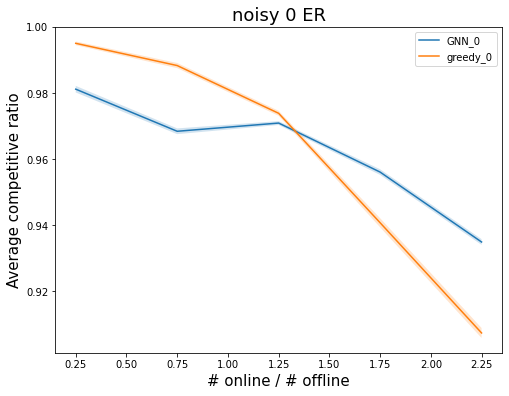

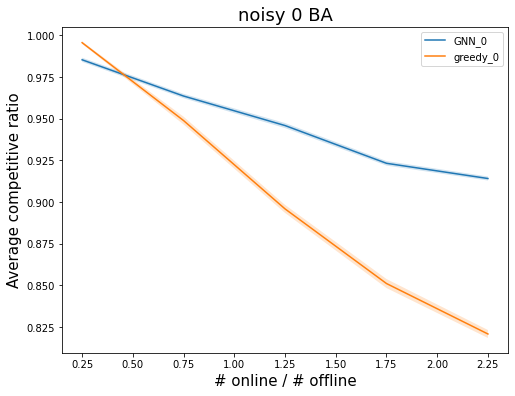

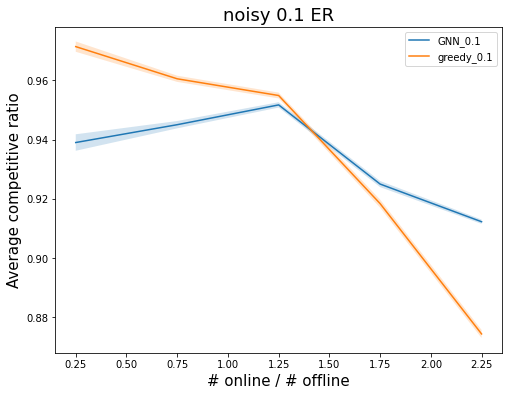

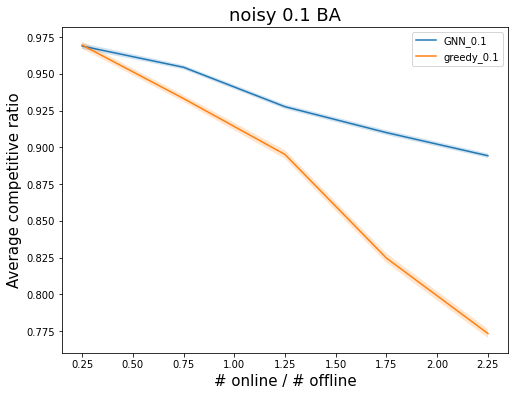

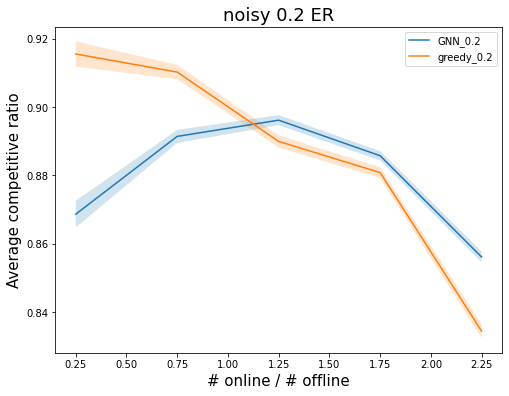

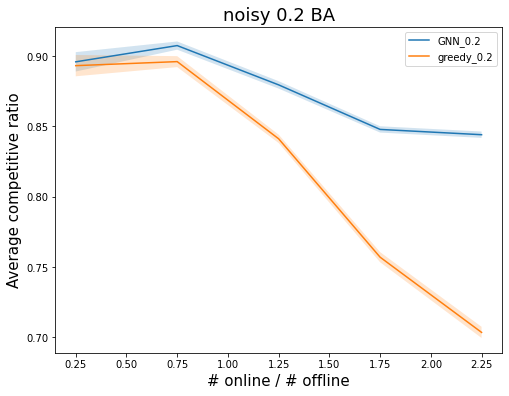

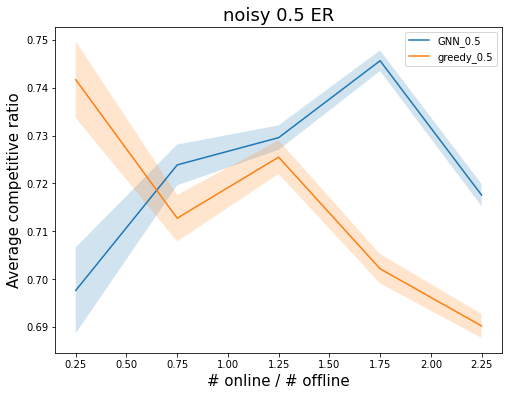

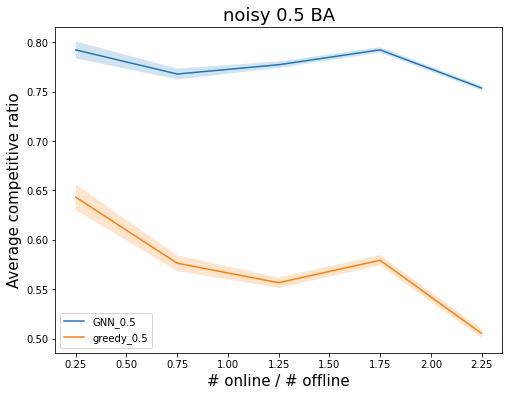

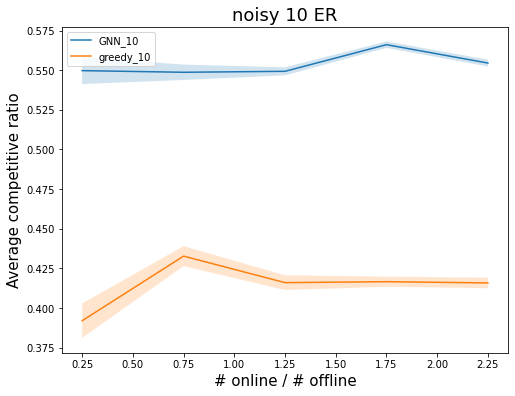

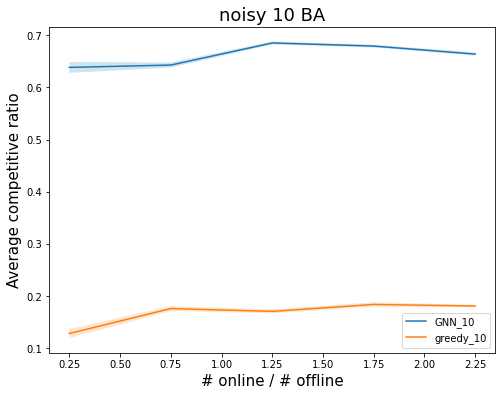

In [18]:
from util import _plot_approx_ratios
for noise_value in noise_values:
	_plot_approx_ratios(ratios, data[noise_value], lambda graph_type: f"noisy {noise_value} {graph_type}", confidence = 0.95)

## FEAT graph evaluation

In [ ]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    {
        'graph_type': 'FEAT',
        'q': 0.75,
        'weighted': True
    },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.9,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.95,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['q']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

In [ ]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for q, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[2]).mean())

    # title = f"PART_size_{size}"
    title = f"FEAT_only_ratings_{q}"
    print(title)
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    # plt.savefig(f"data/{title}.png")
    plt.show()


## OSMNX evaluation

In [ ]:
num_trials = 30
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

graph_configs = [
    {
        'graph_type': 'OSMNX',
        'location_graph': piedmont['location_graph'],
        'city': piedmont['city']
    },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': carmel['location_graph'],
    #     'city': carmel['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': geneva['location_graph'],
    #     'city': geneva['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': founex['location_graph'],
    #     'city': founex['city']
    # },
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['city']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        thresholded_greedy_ratios = [0]

        data[graph_config['city']].append(np.array(
            [
                gnn_learned_ratios,
                thresholded_greedy_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

In [ ]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
print(ratios)
for city, comp_ratios in data.items():
    greedy_avg_ratios = []
    thresholded_greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        thresholded_greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[2]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[3]).mean())
        

    title = f"OSMNX_discard_{city}"
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, thresholded_greedy_avg_ratios, label='Thresholded Greedy')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()



## Graph transferability

In [ ]:
num_trials = 40
node_configs = [(x, x) for x in np.arange(4, 40, 4)]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]


graph_configs = [
    {
    'graph_type': 'FEAT',
    'q': 0.75,
    'weighted': True
    },
]

sizes = [x for (x,_) in node_configs]
print(sizes)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)

        cr_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'lp_rounding']
        )

        thresholded_greedy_ratios = [0]

        data[graph_config['q']].append(cr_ratios)

In [ ]:
import matplotlib.pyplot as plt

sizes = [x for (x,_) in node_configs]

aggregated_ratios = {}
for q, comp_ratios in data.items():
    for trial_ratios in comp_ratios:
        for model, ratio_values in trial_ratios.items():
            current_ratios = aggregated_ratios.get(model, [])
            current_ratios.append(np.array(ratio_values).mean())
            aggregated_ratios[model] = current_ratios

fig = plt.figure(figsize=(8,6))
for model, ratios in aggregated_ratios.items():
    plt.plot(sizes, ratios, label=model)

title = f"16_01_2024_graph_transferability_{q}"
plt.title("Graph transferability NxN ratio - trained on 8x8")
plt.xlabel('Number of online nodes')
plt.ylabel('Average competitive ratio')
plt.legend()
plt.savefig(f"data/{title}.png")
plt.show()
